In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

%matplotlib inline

In [2]:
wego = pd.read_csv("../data/Headway Data, 8-1-2023 to 9-30-2023.csv")
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)
wego.head(15)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0
5,120230801,1,99457895,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 05:25:00,2023-08-01 05:24:03,2023-08-01 05:24:03,0.950000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
6,120230801,1,99457896,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MHSP,14.0,2,36.181248,-86.847705,2023-08-01 05:32:00,2023-08-01 05:30:30,2023-08-01 05:30:30,1.500000,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0
8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN
9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN


In [3]:
wego['ADHERENCE_ID'].value_counts()

ADHERENCE_ID
100222616    2
99457890     1
100624111    1
100624119    1
100624118    1
            ..
100035186    1
100035185    1
100035184    1
100035183    1
100406614    1
Name: count, Length: 350328, dtype: int64

In [4]:
wego.loc[wego['ADHERENCE_ID']==100222616]

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
155191,120230828,1,100222616,2023-08-28,22,2210,1762,350217,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-28 10:23:00,2023-08-28 10:23:06,2023-08-28 10:26:39,-3.65,13.0,17.1,4.1,0,0,1,0,0.0,0,3.55,118.0
155192,120230828,1,100222616,2023-08-28,22,2210,1762,350217,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-28 10:23:00,2023-08-28 10:23:06,2023-08-28 10:26:39,-3.65,13.0,17.1,4.1,0,0,1,0,0.0,0,3.55,8.0


In [5]:
wego.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350329 entries, 0 to 350328
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CALENDAR_ID                350329 non-null  int64  
 1   SERVICE_ABBR               350329 non-null  int64  
 2   ADHERENCE_ID               350329 non-null  int64  
 3   DATE                       350329 non-null  object 
 4   ROUTE_ABBR                 350329 non-null  int64  
 5   BLOCK_ABBR                 350329 non-null  int64  
 6   OPERATOR                   350329 non-null  int64  
 7   TRIP_ID                    350329 non-null  int64  
 8   OVERLOAD_ID                350329 non-null  int64  
 9   ROUTE_DIRECTION_NAME       350329 non-null  object 
 10  TIME_POINT_ABBR            350329 non-null  object 
 11  ROUTE_STOP_SEQUENCE        350318 non-null  float64
 12  TRIP_EDGE                  350329 non-null  int64  
 13  LATITUDE                   35

In [6]:
wego['TRIP_ID'].nunique()

3987

1. What is the overall on-time performance, and what do the overall distribution of adherence look like? 77% ontime and 23% not ontime.

In [8]:
ontime_counts=wego['ADJUSTED_ONTIME_COUNT'].value_counts().to_frame().reset_index()
ontime_counts

,ADJUSTED_ONTIME_COUNT,count
0,1,270048
1,0,80281


In [9]:
round(len(wego.loc[wego['ADJUSTED_ONTIME_COUNT']==1])/ontime_counts['count'].sum()*100, 2)

77.08

In [10]:
round(len(wego.loc[wego['ADJUSTED_ONTIME_COUNT']==0])/ontime_counts['count'].sum()*100, 2)

22.92

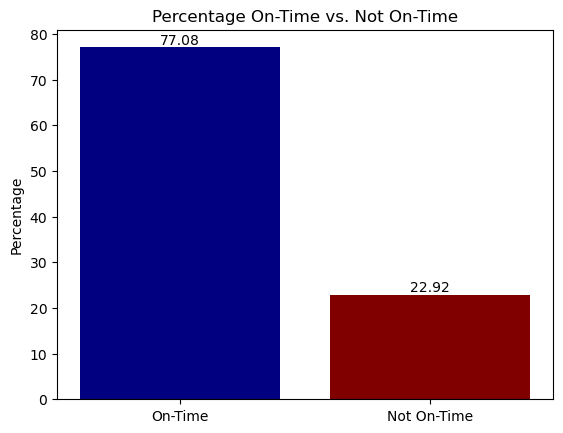

In [11]:
percent=[round(len(wego.loc[wego['ADJUSTED_ONTIME_COUNT']==1])/ontime_counts['count'].sum()*100, 2), round(len(wego.loc[wego['ADJUSTED_ONTIME_COUNT']==0])/ontime_counts['count'].sum()*100, 2)]
labels=['On-Time', 'Not On-Time']
fig, ax = plt.subplots()
bars = ax.bar(labels, percent, color=['navy', 'maroon'])
ax.bar_label(bars)
plt.ylabel('Percentage')
plt.title('Percentage On-Time vs. Not On-Time')
plt.savefig('ontime_not.png')
plt.show();

In [12]:
not_ontime=wego.loc[wego['ADJUSTED_ONTIME_COUNT']==0]
not_ontime['ADJUSTED_ONTIME_COUNT'].count()

80281

In [13]:
not_ontime['ADJUSTED_EARLY_COUNT'].sum()

9775

In [14]:
not_ontime['ADJUSTED_LATE_COUNT'].sum()

59038

In [15]:
round(not_ontime['ADJUSTED_EARLY_COUNT'].sum()/not_ontime['ADJUSTED_ONTIME_COUNT'].count()*100, 2)

12.18

In [16]:
round(not_ontime['ADJUSTED_LATE_COUNT'].sum()/not_ontime['ADJUSTED_ONTIME_COUNT'].count()*100, 2)

73.54

Of those not on time, 12% were considered early, and 74% were considered late.

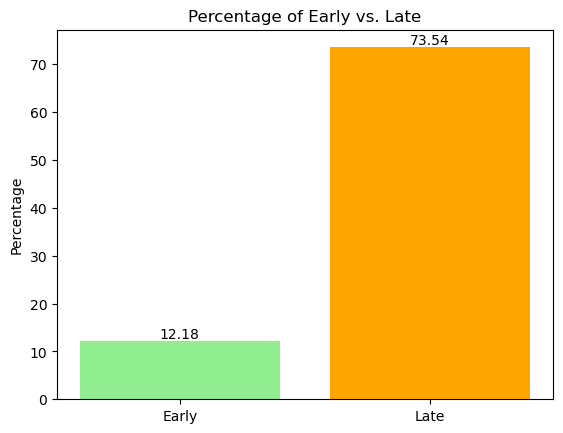

In [17]:
percent=[round(not_ontime['ADJUSTED_EARLY_COUNT'].sum()/not_ontime['ADJUSTED_ONTIME_COUNT'].count()*100, 2), round(not_ontime['ADJUSTED_LATE_COUNT'].sum()/not_ontime['ADJUSTED_ONTIME_COUNT'].count()*100, 2)]
labels=['Early', 'Late']
fig, ax = plt.subplots()
bars = ax.bar(labels, percent, color=['lightgreen', 'orange'])
ax.bar_label(bars)
plt.ylabel('Percentage')
plt.title('Percentage of Early vs. Late')
plt.savefig('early_late.png')
plt.show();

In [18]:
wego['ADHERENCE'].describe()

count    338861.000000
mean         -3.188796
std           6.898842
min        -948.533333
25%          -4.566666
50%          -2.000000
75%          -0.333333
max          88.383333
Name: ADHERENCE, dtype: float64

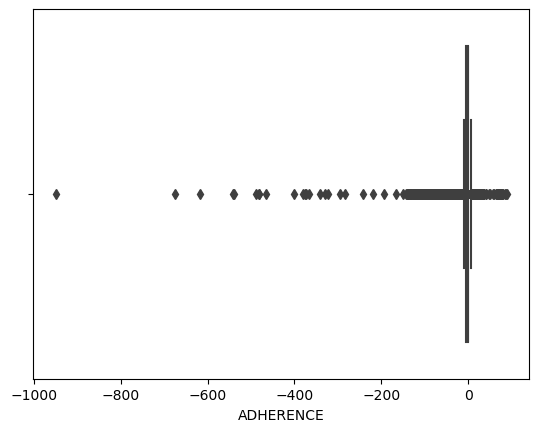

In [19]:
sns.boxplot(x=wego['ADHERENCE'])
plt.show()

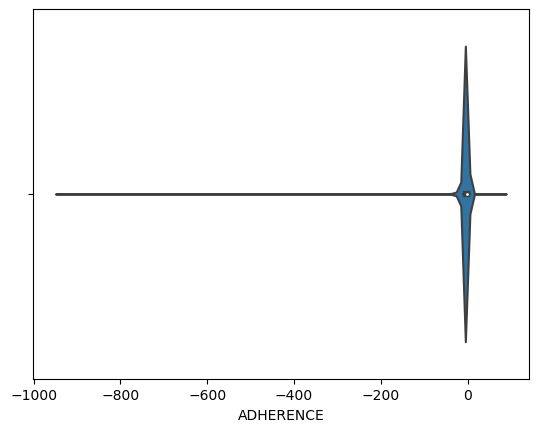

In [20]:
sns.violinplot(x=wego['ADHERENCE'])
plt.show()

In [21]:
all_ontime=wego.loc[wego['ADJUSTED_ONTIME_COUNT']==1]

In [22]:
all_ontime['ADHERENCE'].describe()

count    270048.000000
mean         -1.490594
std           2.364806
min          -6.000000
25%          -3.066666
50%          -1.483333
75%          -0.216666
max          34.716666
Name: ADHERENCE, dtype: float64

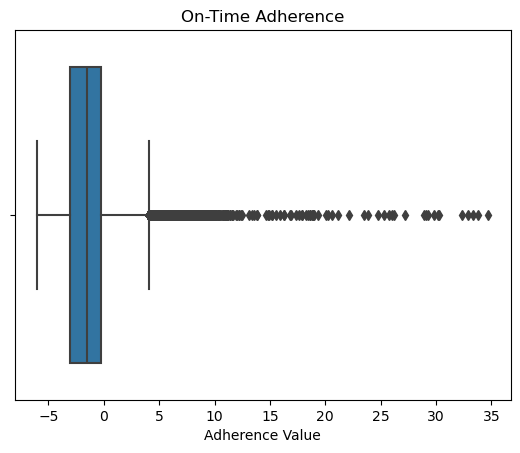

In [23]:
sns.boxplot(x=all_ontime['ADHERENCE'])
plt.title('On-Time Adherence')
plt.xlabel('Adherence Value')
plt.savefig('overallad.png')
plt.show();

2. How does direction of travel, route, or location affect the on-time performance? My contribution was to look at route. Route 22 was most on time with 87% being on time. Route 55 was the most not on time with 32% being considered not on time.

In [25]:
wego['ROUTE_ABBR'].value_counts()

ROUTE_ABBR
55    61944
56    60020
52    51819
3     47162
50    43291
23    42108
22    25959
7     18026
Name: count, dtype: int64

In [26]:
route_3=wego.loc[wego['ROUTE_ABBR']==3]
route_7=wego.loc[wego['ROUTE_ABBR']==7]
route_22=wego.loc[wego['ROUTE_ABBR']==22]
route_23=wego.loc[wego['ROUTE_ABBR']==23]
route_50=wego.loc[wego['ROUTE_ABBR']==50]
route_52=wego.loc[wego['ROUTE_ABBR']==52]
route_55=wego.loc[wego['ROUTE_ABBR']==55]
route_56=wego.loc[wego['ROUTE_ABBR']==56]

In [27]:
round(len(route_3.loc[route_3['ADJUSTED_ONTIME_COUNT']==1])/len(route_3['ADJUSTED_ONTIME_COUNT'])*100, 2)

73.19

In [28]:
round(len(route_3.loc[route_3['ADJUSTED_ONTIME_COUNT']==0])/len(route_3['ADJUSTED_ONTIME_COUNT'])*100, 2)

26.81

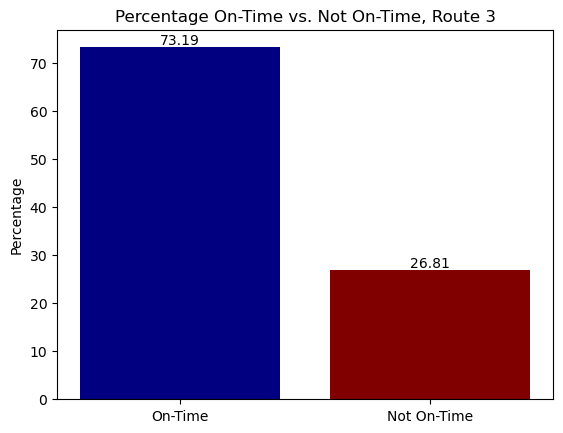

In [29]:
percent=[round(len(route_3.loc[route_3['ADJUSTED_ONTIME_COUNT']==1])/len(route_3['ADJUSTED_ONTIME_COUNT'])*100, 2), round(len(route_3.loc[route_3['ADJUSTED_ONTIME_COUNT']==0])/len(route_3['ADJUSTED_ONTIME_COUNT'])*100, 2)]
labels=['On-Time', 'Not On-Time']
fig, ax = plt.subplots()
bars = ax.bar(labels, percent, color=['navy', 'maroon'])
ax.bar_label(bars)
plt.ylabel('Percentage')
plt.title('Percentage On-Time vs. Not On-Time, Route 3')
plt.savefig('route3.png')
plt.show();

In [30]:
route_3['ADHERENCE'].describe()

count    45488.000000
mean        -3.761491
std          5.415910
min       -133.250000
25%         -5.350000
50%         -2.566666
75%         -0.766666
max         33.750000
Name: ADHERENCE, dtype: float64

In [31]:
route_3_ontime=route_3.loc[route_3['ADJUSTED_ONTIME_COUNT']==1]
route_3_ontime['ADHERENCE'].describe()

count    34516.000000
mean        -1.941797
std          2.142970
min         -6.000000
25%         -3.483333
50%         -1.916666
75%         -0.550000
max         33.750000
Name: ADHERENCE, dtype: float64

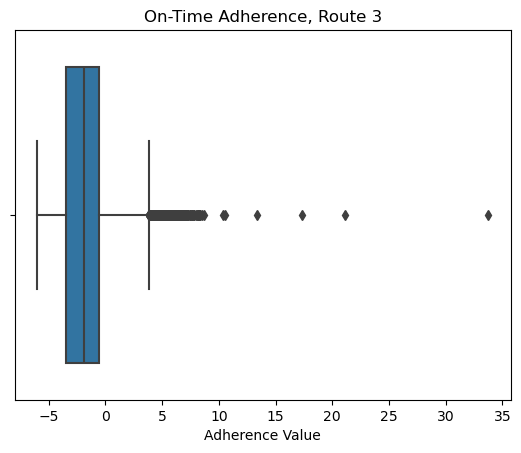

In [32]:
sns.boxplot(x=route_3_ontime['ADHERENCE'])
plt.title('On-Time Adherence, Route 3')
plt.xlabel('Adherence Value')
plt.savefig('route3ad.png')
plt.show();

In [33]:
round(len(route_7.loc[route_7['ADJUSTED_ONTIME_COUNT']==1])/len(route_7['ADJUSTED_ONTIME_COUNT'])*100, 2)

74.43

In [34]:
round(len(route_7.loc[route_7['ADJUSTED_ONTIME_COUNT']==0])/len(route_7['ADJUSTED_ONTIME_COUNT'])*100, 2)

25.57

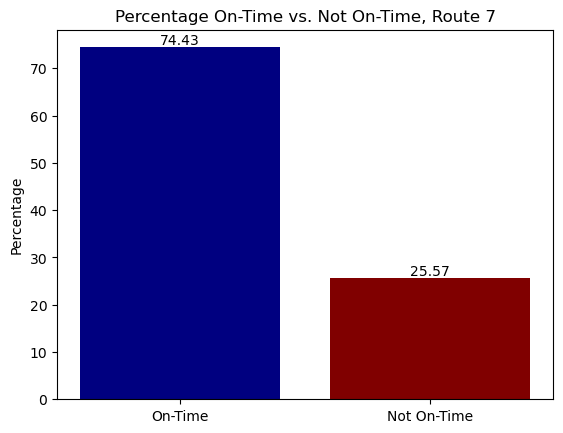

In [35]:
percent=[round(len(route_7.loc[route_7['ADJUSTED_ONTIME_COUNT']==1])/len(route_7['ADJUSTED_ONTIME_COUNT'])*100, 2), round(len(route_7.loc[route_7['ADJUSTED_ONTIME_COUNT']==0])/len(route_7['ADJUSTED_ONTIME_COUNT'])*100, 2)]
labels=['On-Time', 'Not On-Time']
fig, ax = plt.subplots()
bars = ax.bar(labels, percent, color=['navy', 'maroon'])
ax.bar_label(bars)
plt.ylabel('Percentage')
plt.title('Percentage On-Time vs. Not On-Time, Route 7')
plt.savefig('route7.png')
plt.show();

In [36]:
route_7['ADHERENCE'].describe()

count    17267.000000
mean        -3.346555
std          6.669753
min        -87.716666
25%         -4.916666
50%         -2.116666
75%         -0.616666
max         88.383333
Name: ADHERENCE, dtype: float64

In [37]:
route_7_ontime=route_7.loc[route_7['ADJUSTED_ONTIME_COUNT']==1]
route_7_ontime['ADHERENCE'].describe()

count    13417.000000
mean        -1.523357
std          2.380572
min         -6.000000
25%         -3.066666
50%         -1.516666
75%         -0.450000
max         30.266666
Name: ADHERENCE, dtype: float64

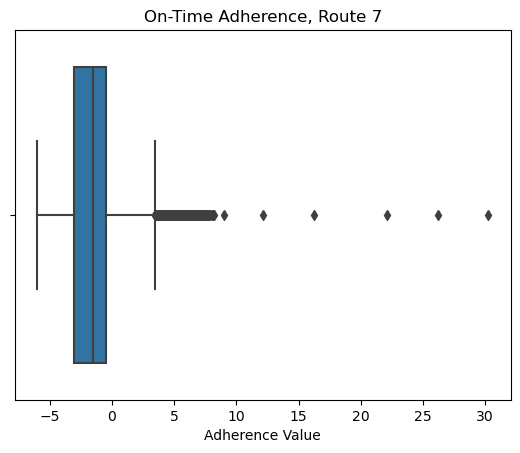

In [38]:
sns.boxplot(x=route_7_ontime['ADHERENCE'])
plt.title('On-Time Adherence, Route 7')
plt.xlabel('Adherence Value')
plt.savefig('route7ad.png')
plt.show();

In [39]:
round(len(route_22.loc[route_22['ADJUSTED_ONTIME_COUNT']==1])/len(route_22['ADJUSTED_ONTIME_COUNT'])*100, 2)

86.64

In [40]:
round(len(route_22.loc[route_22['ADJUSTED_ONTIME_COUNT']==0])/len(route_22['ADJUSTED_ONTIME_COUNT'])*100, 2)

13.36

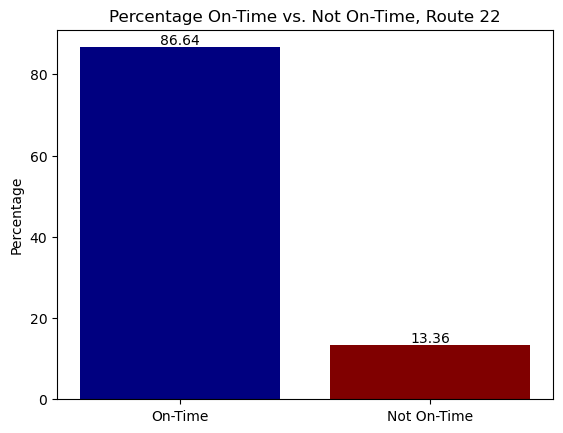

In [41]:
percent=[round(len(route_22.loc[route_22['ADJUSTED_ONTIME_COUNT']==1])/len(route_22['ADJUSTED_ONTIME_COUNT'])*100, 2), round(len(route_22.loc[route_22['ADJUSTED_ONTIME_COUNT']==0])/len(route_22['ADJUSTED_ONTIME_COUNT'])*100, 2)]
labels=['On-Time', 'Not On-Time']
fig, ax = plt.subplots()
bars = ax.bar(labels, percent, color=['navy', 'maroon'])
ax.bar_label(bars)
plt.ylabel('Percentage')
plt.title('Percentage On-Time vs. Not On-Time, Route 22')
plt.savefig('route22.png')
plt.show();

In [42]:
route_22['ADHERENCE'].describe()

count    25188.000000
mean        -1.138107
std          6.391798
min       -675.000000
25%         -2.950000
50%         -0.933333
75%          0.816666
max         24.733333
Name: ADHERENCE, dtype: float64

In [43]:
route_22_ontime=route_22.loc[route_22['ADJUSTED_ONTIME_COUNT']==1]
route_22_ontime['ADHERENCE'].describe()

count    22492.000000
mean        -0.400413
std          3.025467
min         -6.000000
25%         -2.416666
50%         -0.700000
75%          0.833333
max         24.733333
Name: ADHERENCE, dtype: float64

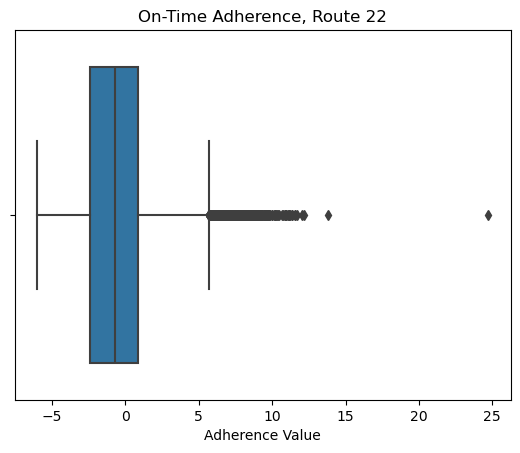

In [44]:
sns.boxplot(x=route_22_ontime['ADHERENCE'])
plt.title('On-Time Adherence, Route 22')
plt.xlabel('Adherence Value')
plt.savefig('route22ad.png')
plt.show();

In [45]:
round(len(route_23.loc[route_23['ADJUSTED_ONTIME_COUNT']==1])/len(route_23['ADJUSTED_ONTIME_COUNT'])*100, 2)

83.44

In [46]:
round(len(route_23.loc[route_23['ADJUSTED_ONTIME_COUNT']==0])/len(route_23['ADJUSTED_ONTIME_COUNT'])*100, 2)

16.56

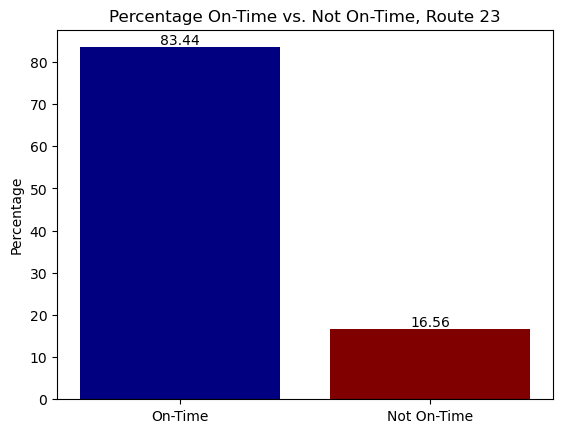

In [47]:
percent=[round(len(route_23.loc[route_23['ADJUSTED_ONTIME_COUNT']==1])/len(route_23['ADJUSTED_ONTIME_COUNT'])*100, 2), round(len(route_23.loc[route_23['ADJUSTED_ONTIME_COUNT']==0])/len(route_23['ADJUSTED_ONTIME_COUNT'])*100, 2)]
labels=['On-Time', 'Not On-Time']
fig, ax = plt.subplots()
bars = ax.bar(labels, percent, color=['navy', 'maroon'])
ax.bar_label(bars)
plt.ylabel('Percentage')
plt.title('Percentage On-Time vs. Not On-Time, Route 23')
plt.savefig('route23.png')
plt.show();

In [48]:
route_23['ADHERENCE'].describe()

count    39653.000000
mean        -1.760110
std          7.680491
min       -618.166666
25%         -3.116666
50%         -1.316666
75%          0.033333
max         33.633333
Name: ADHERENCE, dtype: float64

In [49]:
route_23_ontime=route_23.loc[route_23['ADJUSTED_ONTIME_COUNT']==1]
route_23_ontime['ADHERENCE'].describe()

count    35137.000000
mean        -1.082745
std          2.499485
min         -6.000000
25%         -2.600000
50%         -1.183333
75%          0.000000
max         32.916666
Name: ADHERENCE, dtype: float64

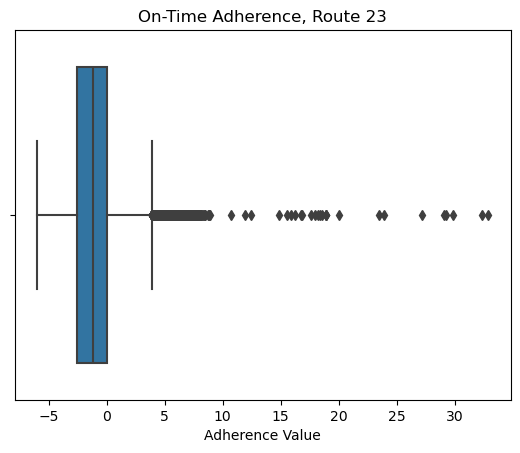

In [50]:
sns.boxplot(x=route_23_ontime['ADHERENCE'])
plt.title('On-Time Adherence, Route 23')
plt.xlabel('Adherence Value')
plt.savefig('route23ad.png')
plt.show();

In [51]:
round(len(route_50.loc[route_50['ADJUSTED_ONTIME_COUNT']==1])/len(route_50['ADJUSTED_ONTIME_COUNT'])*100, 2)

83.87

In [52]:
round(len(route_50.loc[route_50['ADJUSTED_ONTIME_COUNT']==0])/len(route_50['ADJUSTED_ONTIME_COUNT'])*100, 2)

16.13

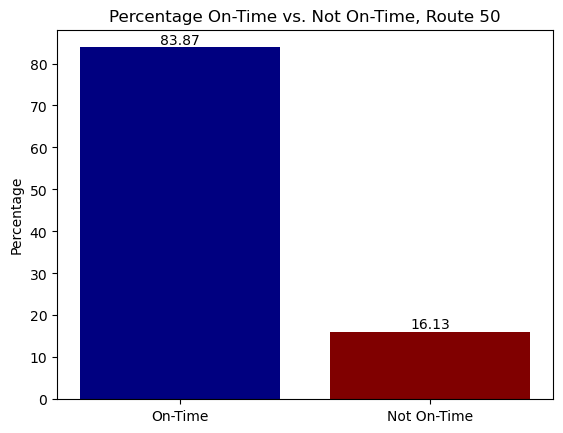

In [53]:
percent=[round(len(route_50.loc[route_50['ADJUSTED_ONTIME_COUNT']==1])/len(route_50['ADJUSTED_ONTIME_COUNT'])*100, 2), round(len(route_50.loc[route_50['ADJUSTED_ONTIME_COUNT']==0])/len(route_50['ADJUSTED_ONTIME_COUNT'])*100, 2)]
labels=['On-Time', 'Not On-Time']
fig, ax = plt.subplots()
bars = ax.bar(labels, percent, color=['navy', 'maroon'])
ax.bar_label(bars)
plt.ylabel('Percentage')
plt.title('Percentage On-Time vs. Not On-Time, Route 50')
plt.savefig('route50.png')
plt.show();

In [54]:
route_50['ADHERENCE'].describe()

count    42629.000000
mean        -2.505022
std          6.159666
min       -489.316666
25%         -3.883333
50%         -1.800000
75%         -0.300000
max         22.350000
Name: ADHERENCE, dtype: float64

In [55]:
route_50_ontime=route_50.loc[route_50['ADJUSTED_ONTIME_COUNT']==1]
route_50_ontime['ADHERENCE'].describe()

count    36309.000000
mean        -1.545864
std          2.200595
min         -6.000000
25%         -3.050000
50%         -1.483333
75%         -0.250000
max         18.800000
Name: ADHERENCE, dtype: float64

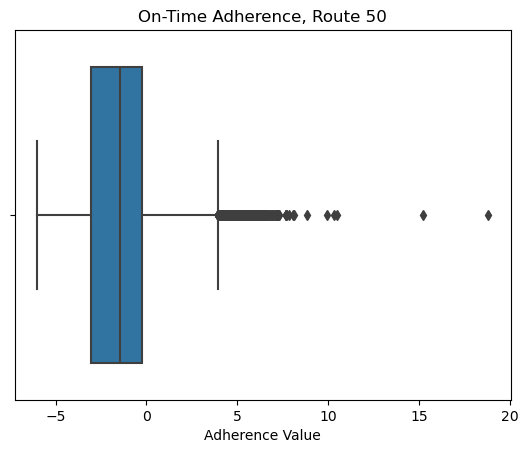

In [56]:
sns.boxplot(x=route_50_ontime['ADHERENCE'])
plt.title('On-Time Adherence, Route 50')
plt.xlabel('Adherence Value')
plt.savefig('route50ad.png')
plt.show();

In [57]:
round(len(route_52.loc[route_52['ADJUSTED_ONTIME_COUNT']==1])/len(route_52['ADJUSTED_ONTIME_COUNT'])*100, 2)

72.82

In [58]:
round(len(route_52.loc[route_52['ADJUSTED_ONTIME_COUNT']==0])/len(route_52['ADJUSTED_ONTIME_COUNT'])*100, 2)

27.18

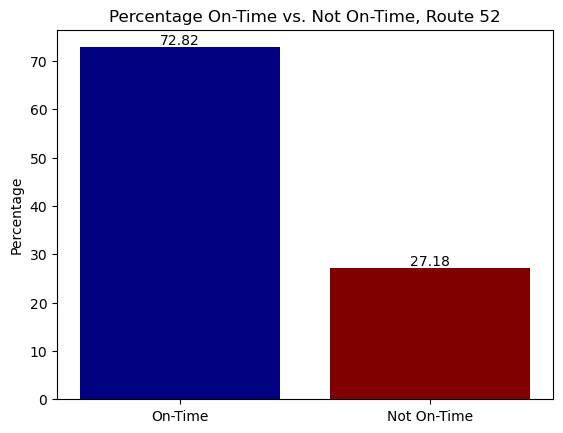

In [59]:
percent=[round(len(route_52.loc[route_52['ADJUSTED_ONTIME_COUNT']==1])/len(route_52['ADJUSTED_ONTIME_COUNT'])*100, 2), round(len(route_52.loc[route_52['ADJUSTED_ONTIME_COUNT']==0])/len(route_52['ADJUSTED_ONTIME_COUNT'])*100, 2)]
labels=['On-Time', 'Not On-Time']
fig, ax = plt.subplots()
bars = ax.bar(labels, percent, color=['navy', 'maroon'])
ax.bar_label(bars)
plt.ylabel('Percentage')
plt.title('Percentage On-Time vs. Not On-Time, Route 52')
plt.savefig('route52.png')
plt.show();

In [60]:
route_52['ADHERENCE'].describe()

count    49327.000000
mean        -3.971342
std          8.721732
min       -948.533333
25%         -5.016666
50%         -2.066666
75%         -0.400000
max         30.200000
Name: ADHERENCE, dtype: float64

In [61]:
route_52_ontime=route_52.loc[route_52['ADJUSTED_ONTIME_COUNT']==1]
route_52_ontime['ADHERENCE'].describe()

count    37736.000000
mean        -1.622960
std          2.037566
min         -6.000000
25%         -3.000000
50%         -1.416666
75%         -0.250000
max         30.200000
Name: ADHERENCE, dtype: float64

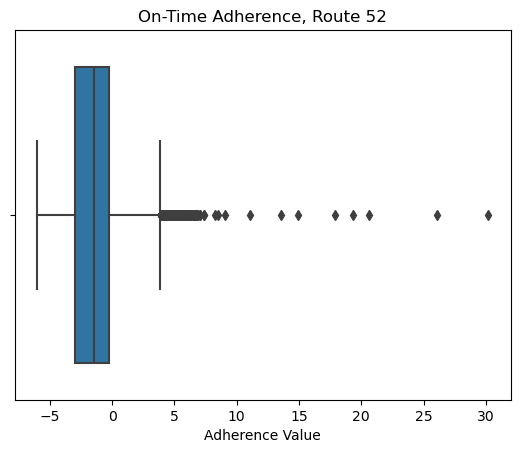

In [62]:
sns.boxplot(x=route_52_ontime['ADHERENCE'])
plt.title('On-Time Adherence, Route 52')
plt.xlabel('Adherence Value')
plt.savefig('route52ad.png')
plt.show();

In [63]:
round(len(route_55.loc[route_55['ADJUSTED_ONTIME_COUNT']==1])/len(route_55['ADJUSTED_ONTIME_COUNT'])*100, 2)

67.93

In [64]:
round(len(route_55.loc[route_55['ADJUSTED_ONTIME_COUNT']==0])/len(route_55['ADJUSTED_ONTIME_COUNT'])*100, 2)

32.07

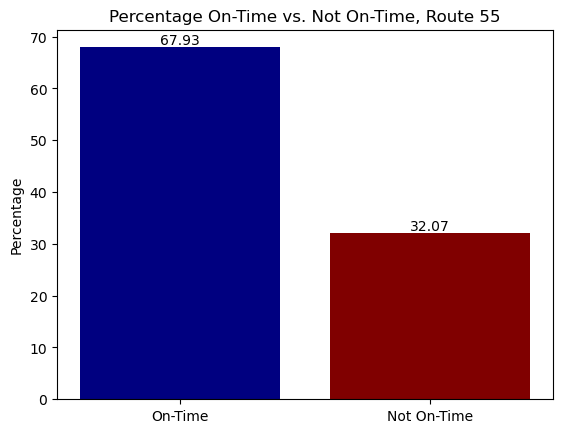

In [65]:
percent=[round(len(route_55.loc[route_55['ADJUSTED_ONTIME_COUNT']==1])/len(route_55['ADJUSTED_ONTIME_COUNT'])*100, 2), round(len(route_55.loc[route_55['ADJUSTED_ONTIME_COUNT']==0])/len(route_55['ADJUSTED_ONTIME_COUNT'])*100, 2)]
labels=['On-Time', 'Not On-Time']
fig, ax = plt.subplots()
bars = ax.bar(labels, percent, color=['navy', 'maroon'])
ax.bar_label(bars)
plt.ylabel('Percentage')
plt.title('Percentage On-Time vs. Not On-Time, Route 55')
plt.savefig('route55.png')
plt.show();

In [66]:
route_55['ADHERENCE'].describe()

count    60359.000000
mean        -4.823302
std          7.535092
min       -375.233333
25%         -6.583333
50%         -2.883333
75%         -0.850000
max         40.250000
Name: ADHERENCE, dtype: float64

In [67]:
route_55_ontime=route_55.loc[route_55['ADJUSTED_ONTIME_COUNT']==1]
route_55_ontime['ADHERENCE'].describe()

count    42080.000000
mean        -1.862926
std          2.148719
min         -6.000000
25%         -3.383333
50%         -1.783333
75%         -0.450000
max         34.716666
Name: ADHERENCE, dtype: float64

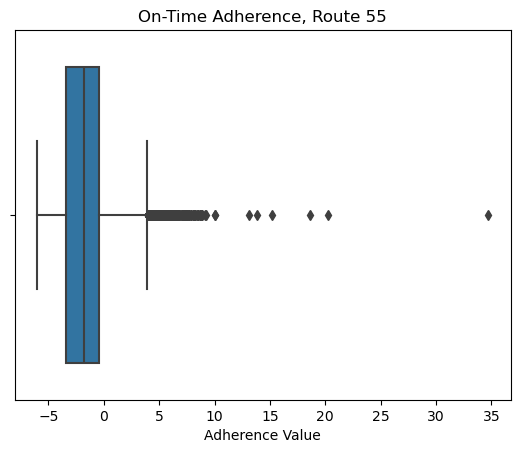

In [68]:
sns.boxplot(x=route_55_ontime['ADHERENCE'])
plt.title('On-Time Adherence, Route 55')
plt.xlabel('Adherence Value')
plt.savefig('route55ad.png')
plt.show();

In [69]:
round(len(route_56.loc[route_56['ADJUSTED_ONTIME_COUNT']==1])/len(route_56['ADJUSTED_ONTIME_COUNT'])*100, 2)

80.57

In [70]:
round(len(route_56.loc[route_56['ADJUSTED_ONTIME_COUNT']==0])/len(route_56['ADJUSTED_ONTIME_COUNT'])*100, 2)

19.43

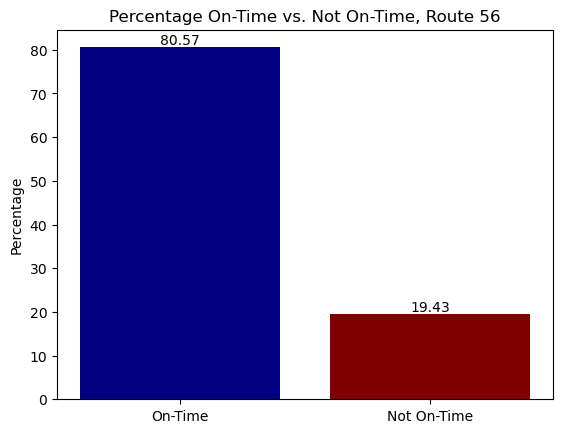

In [71]:
percent=[round(len(route_56.loc[route_56['ADJUSTED_ONTIME_COUNT']==1])/len(route_56['ADJUSTED_ONTIME_COUNT'])*100, 2), round(len(route_56.loc[route_56['ADJUSTED_ONTIME_COUNT']==0])/len(route_56['ADJUSTED_ONTIME_COUNT'])*100, 2)]
labels=['On-Time', 'Not On-Time']
fig, ax = plt.subplots()
bars = ax.bar(labels, percent, color=['navy', 'maroon'])
ax.bar_label(bars)
plt.ylabel('Percentage')
plt.title('Percentage On-Time vs. Not On-Time, Route 56')
plt.savefig('route56.png')
plt.show();

In [72]:
route_56['ADHERENCE'].describe()

count    58950.000000
mean        -2.703988
std          4.931009
min       -322.783333
25%         -4.300000
50%         -1.900000
75%         -0.283333
max         39.916666
Name: ADHERENCE, dtype: float64

In [73]:
route_56_ontime=route_56.loc[route_56['ADJUSTED_ONTIME_COUNT']==1]
route_56_ontime['ADHERENCE'].describe()

count    48361.000000
mean        -1.494070
std          2.394508
min         -6.000000
25%         -3.150000
50%         -1.500000
75%         -0.200000
max         33.350000
Name: ADHERENCE, dtype: float64

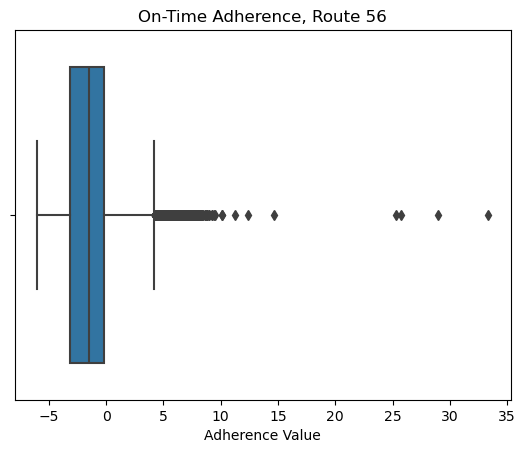

In [74]:
sns.boxplot(x=route_56_ontime['ADHERENCE'])
plt.title('On-Time Adherence, Route 56')
plt.xlabel('Adherence Value')
plt.savefig('route56ad.png')
plt.show();

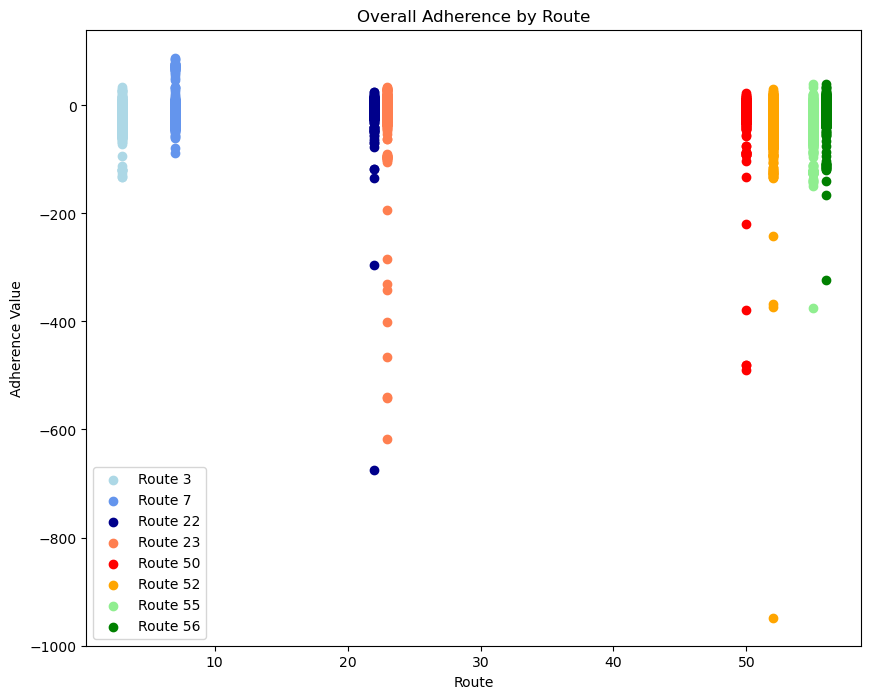

In [75]:
fig, ax = plt.subplots(figsize = (10,8)) 
l3=plt.scatter(x=route_3['ROUTE_ABBR'],y=route_3['ADHERENCE'], color='lightblue', label='Route 3')
l7=plt.scatter(x=route_7['ROUTE_ABBR'],y=route_7['ADHERENCE'], color='cornflowerblue', label='Route 7')
l22=plt.scatter(x=route_22['ROUTE_ABBR'],y=route_22['ADHERENCE'], color='darkblue', label='Route 22')
l23=plt.scatter(x=route_23['ROUTE_ABBR'],y=route_23['ADHERENCE'], color='coral', label='Route 23')
l50=plt.scatter(x=route_50['ROUTE_ABBR'],y=route_50['ADHERENCE'], color='red', label='Route 50')
l52=plt.scatter(x=route_52['ROUTE_ABBR'],y=route_52['ADHERENCE'], color='orange', label='Route 52')
l55=plt.scatter(x=route_55['ROUTE_ABBR'],y=route_55['ADHERENCE'], color='lightgreen', label='Route 55')
l56=plt.scatter(x=route_56['ROUTE_ABBR'],y=route_56['ADHERENCE'], color='green', label='Route 56')
plt.xlabel('Route')
plt.ylabel('Adherence Value')
plt.title('Overall Adherence by Route')
plt.xticks(rotation = 0)
ax.legend(handles=[l3,l7,l22, l23, l50, l52, l55, l56])
plt.savefig('routead.png')
plt.show()

How does the time of day affect on-time performance? Early morning was the most on time at 88%, and afternoon rush hour was the least on time with 32% considered not on time.

In [76]:
wego['SCHEDULED_TIME'].sort_values()

742       2023-08-01 04:20:00
3853      2023-08-01 04:23:00
743       2023-08-01 04:29:00
3854      2023-08-01 04:30:00
4999      2023-08-01 04:30:00
                 ...         
348271    2023-10-01 00:57:00
349317    2023-10-01 01:02:00
347118    2023-10-01 01:04:00
348272    2023-10-01 01:08:00
348273    2023-10-01 01:13:00
Name: SCHEDULED_TIME, Length: 350329, dtype: object

In [77]:
wego['SCHEDULED_TIME']=pd.to_datetime(wego['SCHEDULED_TIME'])

In [78]:
wego['SCHEDULED_TIME'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 350329 entries, 0 to 350328
Series name: SCHEDULED_TIME
Non-Null Count   Dtype         
--------------   -----         
350329 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.7 MB


In [79]:
wego['hour']=wego['SCHEDULED_TIME'].dt.hour

In [80]:
wego.groupby('hour')['ADHERENCE'].agg(['count', 'mean', 'std', 'median', 'min', 'max'])

,count,mean,std,median,min,max
hour,,,,,,
0,4020,-3.071600,6.408801,-1.500000,-58.400000,20.316666
1,111,-3.618168,6.557112,-1.650000,-30.483333,6.316666
4,1690,-1.089960,2.355822,-0.750000,-30.966666,17.650000
5,10080,-1.261005,7.695624,-1.066666,-618.166666,34.250000
6,19339,-1.831436,10.471223,-1.383333,-948.533333,65.483333
7,21961,-3.003120,6.704862,-2.150000,-675.000000,72.816666
8,20635,-3.783631,6.447298,-2.416666,-134.100000,88.383333
9,20191,-2.585913,6.907536,-1.750000,-375.233333,76.700000
10,19953,-2.040670,5.221716,-1.400000,-126.516666,75.983333


In [81]:
for hour, row in wego.iterrows():
    if (row.hour >=4) & (row.hour < 7):
        wego.loc[hour, 'time_of_day'] = "Early Morning"
    if (row.hour >=7) & (row.hour < 10):
        wego.loc[hour, 'time_of_day'] = "Morning Rush Hour"
    if (row.hour >= 10) & (row.hour < 16):
        wego.loc[hour, 'time_of_day'] = "Mid-day"
    if (row.hour >= 16) & (row.hour < 19):
        wego.loc[hour, 'time_of_day'] = "Afternoon Rush Hour"
    if (row.hour < 4) | (row.hour>= 19):
        wego.loc[hour, "time_of_day"] = "Night"

In [82]:
wego['time_of_day'].value_counts()

time_of_day
Mid-day                126184
Morning Rush Hour       64820
Night                   64687
Afternoon Rush Hour     62468
Early Morning           32170
Name: count, dtype: int64

In [83]:
count=wego['time_of_day'].value_counts().reset_index()
time_order=['Early Morning', 'Morning Rush Hour', 'Mid-day', 'Afternoon Rush Hour', 'Night']
count['time_of_day'] = pd.Categorical(count['time_of_day'], categories=time_order, ordered=True)
count=count.sort_values('time_of_day')
count.columns=['Time of Day', 'Count']
count

,Time of Day,Count
4,Early Morning,32170
1,Morning Rush Hour,64820
0,Mid-day,126184
3,Afternoon Rush Hour,62468
2,Night,64687


C:\Users\fromK\AppData\Local\Temp\ipykernel_7612\648803626.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(count['Time of Day'], rotation=45)


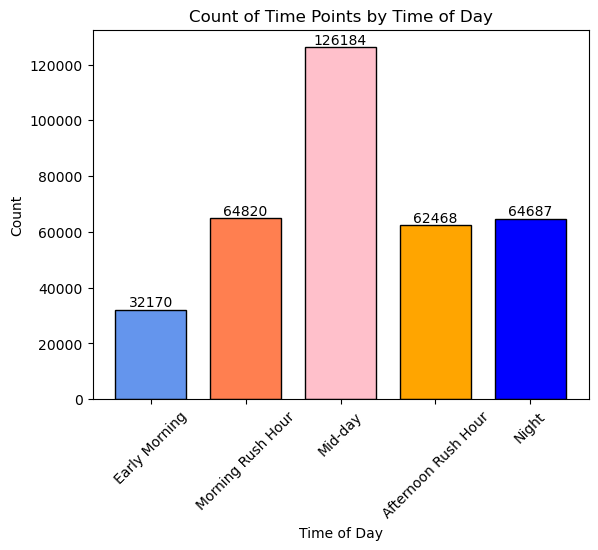

In [84]:
fig, ax = plt.subplots()
bars = ax.bar(count['Time of Day'], count['Count'], color=['cornflowerblue', 'coral', 'pink', 'orange', 'blue'], edgecolor = 'black', width = .75)
ax.bar_label(bars)
plt.xlabel('Time of Day')
ax.set_xticklabels(count['Time of Day'], rotation=45)
plt.ylabel('Count')
plt.title('Count of Time Points by Time of Day')
plt.savefig('timescount.png', bbox_inches='tight')
plt.show();

In [85]:
early_morning=wego.loc[wego['time_of_day']=='Early Morning']
len(early_morning)

32170

In [86]:
morning_rush=wego.loc[wego['time_of_day']=='Morning Rush Hour']
midday=wego.loc[wego['time_of_day']=='Mid-day']
afternoon_rush=wego.loc[wego['time_of_day']=='Afternoon Rush Hour']
night=wego.loc[wego['time_of_day']=='Night']

In [87]:
round(len(early_morning.loc[early_morning['ADJUSTED_ONTIME_COUNT']==1])/len(early_morning['ADJUSTED_ONTIME_COUNT'])*100, 2)

87.73

In [88]:
round(len(early_morning.loc[early_morning['ADJUSTED_ONTIME_COUNT']==0])/len(early_morning['ADJUSTED_ONTIME_COUNT'])*100, 2)

12.27

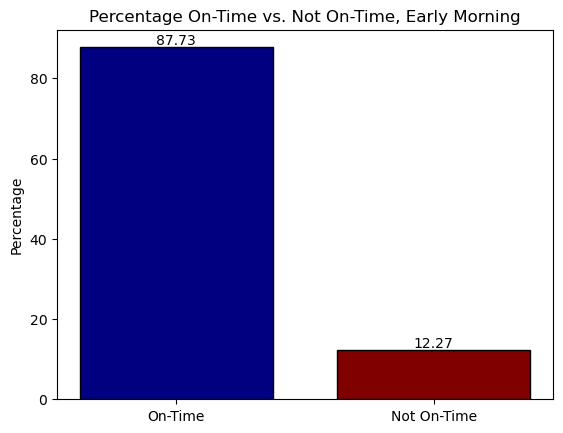

In [89]:
percent=[round(len(early_morning.loc[early_morning['ADJUSTED_ONTIME_COUNT']==1])/len(early_morning['ADJUSTED_ONTIME_COUNT'])*100, 2), round(len(early_morning.loc[early_morning['ADJUSTED_ONTIME_COUNT']==0])/len(early_morning['ADJUSTED_ONTIME_COUNT'])*100, 2)]
labels=['On-Time', 'Not On-Time']
fig, ax = plt.subplots()
bars = ax.bar(labels, percent, color=['navy', 'maroon'], edgecolor = 'black', width = .75)
ax.bar_label(bars)
plt.ylabel('Percentage')
plt.title('Percentage On-Time vs. Not On-Time, Early Morning')
plt.savefig('early.png')
plt.show();

In [90]:
early_morning['ADHERENCE'].describe()

count    31109.000000
mean        -1.606323
std          9.366688
min       -948.533333
25%         -2.833333
50%         -1.200000
75%          0.016666
max         65.483333
Name: ADHERENCE, dtype: float64

In [91]:
early_morning.groupby('hour')['ADHERENCE'].agg(['count', 'mean', 'std', 'median', 'min', 'max'])

,count,mean,std,median,min,max
hour,,,,,,
4,1690,-1.089960,2.355822,-0.750000,-30.966666,17.650000
5,10080,-1.261005,7.695624,-1.066666,-618.166666,34.250000
6,19339,-1.831436,10.471223,-1.383333,-948.533333,65.483333


In [92]:
early_morning_ontime=early_morning.loc[early_morning['ADJUSTED_ONTIME_COUNT']==1]
early_morning_ontime['ADHERENCE'].describe()

count    28223.000000
mean        -1.065114
std          2.415132
min         -6.000000
25%         -2.500000
50%         -1.116666
75%         -0.033333
max         34.716666
Name: ADHERENCE, dtype: float64

In [93]:
early_morning_ontime.groupby('hour')['ADHERENCE'].agg(['count', 'mean', 'std', 'median', 'min', 'max'])

,count,mean,std,median,min,max
hour,,,,,,
4,1581,-0.961016,1.404297,-0.750000,-5.95,17.650000
5,9283,-0.935965,2.429137,-1.050000,-6.00,30.266666
6,17359,-1.143659,2.476410,-1.233333,-6.00,34.716666


In [94]:
round(len(morning_rush.loc[morning_rush['ADJUSTED_ONTIME_COUNT']==1])/len(morning_rush['ADJUSTED_ONTIME_COUNT'])*100, 2)

77.68

In [95]:
round(len(morning_rush.loc[morning_rush['ADJUSTED_ONTIME_COUNT']==0])/len(morning_rush['ADJUSTED_ONTIME_COUNT'])*100, 2)

22.32

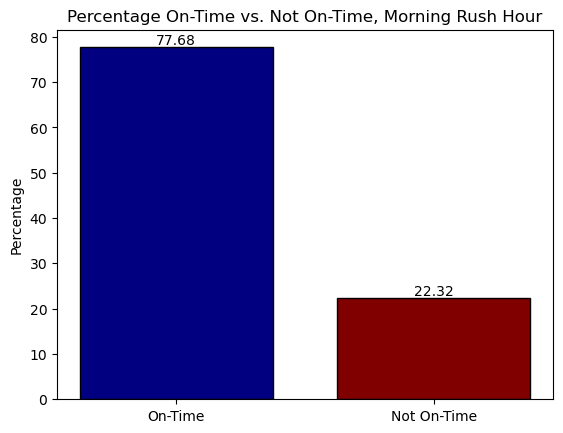

In [96]:
percent=[round(len(morning_rush.loc[morning_rush['ADJUSTED_ONTIME_COUNT']==1])/len(morning_rush['ADJUSTED_ONTIME_COUNT'])*100, 2), round(len(morning_rush.loc[morning_rush['ADJUSTED_ONTIME_COUNT']==0])/len(morning_rush['ADJUSTED_ONTIME_COUNT'])*100, 2)]
labels=['On-Time', 'Not On-Time']
fig, ax = plt.subplots()
bars = ax.bar(labels, percent, color=['navy', 'maroon'], edgecolor = 'black', width = .75)
ax.bar_label(bars)
plt.ylabel('Percentage')
plt.title('Percentage On-Time vs. Not On-Time, Morning Rush Hour')
plt.savefig('morningrush.png')
plt.show();

In [97]:
morning_rush['ADHERENCE'].describe()

count    62787.000000
mean        -3.125471
std          6.705882
min       -675.000000
25%         -4.616666
50%         -2.100000
75%         -0.433333
max         88.383333
Name: ADHERENCE, dtype: float64

In [98]:
morning_rush.groupby('hour')['ADHERENCE'].agg(['count', 'mean', 'std', 'median', 'min', 'max'])

,count,mean,std,median,min,max
hour,,,,,,
7,21961,-3.003120,6.704862,-2.150000,-675.000000,72.816666
8,20635,-3.783631,6.447298,-2.416666,-134.100000,88.383333
9,20191,-2.585913,6.907536,-1.750000,-375.233333,76.700000


In [99]:
morning_rush_ontime=morning_rush.loc[morning_rush['ADJUSTED_ONTIME_COUNT']==1]
morning_rush_ontime['ADHERENCE'].describe()

count    50349.000000
mean        -1.547393
std          2.363383
min         -6.000000
25%         -3.133333
50%         -1.583333
75%         -0.266666
max         33.350000
Name: ADHERENCE, dtype: float64

In [100]:
morning_rush_ontime.groupby('hour')['ADHERENCE'].agg(['count', 'mean', 'std', 'median', 'min', 'max'])

,count,mean,std,median,min,max
hour,,,,,,
7,17824,-1.593761,2.348236,-1.633333,-6.0,9.533333
8,15603,-1.658714,2.358327,-1.700000,-6.0,32.916666
9,16922,-1.395909,2.376296,-1.433333,-6.0,33.350000


In [101]:
round(len(midday.loc[midday['ADJUSTED_ONTIME_COUNT']==1])/len(midday['ADJUSTED_ONTIME_COUNT'])*100, 2)

78.97

In [102]:
round(len(midday.loc[midday['ADJUSTED_ONTIME_COUNT']==0])/len(midday['ADJUSTED_ONTIME_COUNT'])*100, 2)

21.03

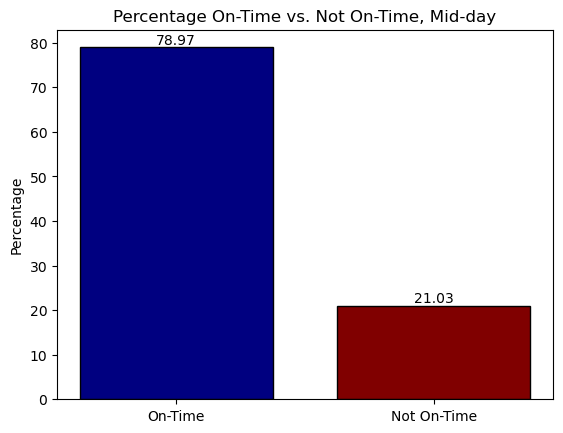

In [103]:
percent=[round(len(midday.loc[midday['ADJUSTED_ONTIME_COUNT']==1])/len(midday['ADJUSTED_ONTIME_COUNT'])*100, 2), round(len(midday.loc[midday['ADJUSTED_ONTIME_COUNT']==0])/len(midday['ADJUSTED_ONTIME_COUNT'])*100, 2)]
labels=['On-Time', 'Not On-Time']
fig, ax = plt.subplots()
bars = ax.bar(labels, percent, color=['navy', 'maroon'], edgecolor = 'black', width = .75)
ax.bar_label(bars)
plt.ylabel('Percentage')
plt.title('Percentage On-Time vs. Not On-Time, Mid-day')
plt.savefig('midday.png')
plt.show();

In [104]:
midday['ADHERENCE'].describe()

count    122699.000000
mean         -2.845071
std           6.412868
min        -489.316666
25%          -4.316666
50%          -1.883333
75%          -0.250000
max          78.733333
Name: ADHERENCE, dtype: float64

In [105]:
midday.groupby('hour')['ADHERENCE'].agg(['count', 'mean', 'std', 'median', 'min', 'max'])

,count,mean,std,median,min,max
hour,,,,,,
10,19953,-2.040670,5.221716,-1.400000,-126.516666,75.983333
11,19923,-2.209074,5.250635,-1.633333,-295.466666,73.033333
12,20170,-2.517117,4.598429,-1.816666,-126.216666,78.733333
13,20026,-2.481100,4.292207,-1.783333,-93.233333,75.300000
14,20590,-3.255852,5.517719,-2.200000,-124.533333,30.400000
15,22037,-4.395507,10.540413,-2.650000,-489.316666,17.466666


In [106]:
midday_ontime=midday.loc[midday['ADJUSTED_ONTIME_COUNT']==1]
midday['ADHERENCE'].describe()

count    122699.000000
mean         -2.845071
std           6.412868
min        -489.316666
25%          -4.316666
50%          -1.883333
75%          -0.250000
max          78.733333
Name: ADHERENCE, dtype: float64

In [107]:
midday.groupby('hour')['ADHERENCE'].agg(['count', 'mean', 'std', 'median', 'min', 'max'])

,count,mean,std,median,min,max
hour,,,,,,
10,19953,-2.040670,5.221716,-1.400000,-126.516666,75.983333
11,19923,-2.209074,5.250635,-1.633333,-295.466666,73.033333
12,20170,-2.517117,4.598429,-1.816666,-126.216666,78.733333
13,20026,-2.481100,4.292207,-1.783333,-93.233333,75.300000
14,20590,-3.255852,5.517719,-2.200000,-124.533333,30.400000
15,22037,-4.395507,10.540413,-2.650000,-489.316666,17.466666


In [108]:
round(len(afternoon_rush.loc[afternoon_rush['ADJUSTED_ONTIME_COUNT']==1])/len(afternoon_rush['ADJUSTED_ONTIME_COUNT'])*100, 2)

67.97

In [109]:
round(len(afternoon_rush.loc[afternoon_rush['ADJUSTED_ONTIME_COUNT']==0])/len(afternoon_rush['ADJUSTED_ONTIME_COUNT'])*100, 2)

32.03

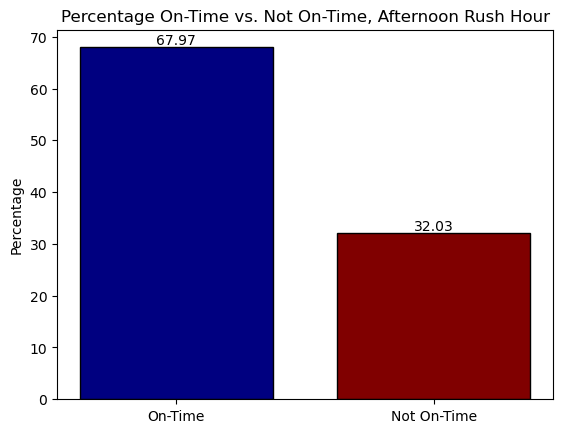

In [110]:
percent=[round(len(afternoon_rush.loc[afternoon_rush['ADJUSTED_ONTIME_COUNT']==1])/len(afternoon_rush['ADJUSTED_ONTIME_COUNT'])*100, 2), round(len(afternoon_rush.loc[afternoon_rush['ADJUSTED_ONTIME_COUNT']==0])/len(afternoon_rush['ADJUSTED_ONTIME_COUNT'])*100, 2)]
labels=['On-Time', 'Not On-Time']
fig, ax = plt.subplots()
bars = ax.bar(labels, percent, color=['navy', 'maroon'], edgecolor = 'black', width = .75)
ax.bar_label(bars)
plt.ylabel('Percentage')
plt.title('Percentage On-Time vs. Not On-Time, Afternoon Rush Hour')
plt.savefig('afternoon.png')
plt.show();

In [111]:
afternoon_rush['ADHERENCE'].describe()

count    59963.000000
mean        -4.671374
std          7.531102
min       -366.933333
25%         -6.316666
50%         -2.716666
75%         -0.666666
max         31.183333
Name: ADHERENCE, dtype: float64

In [112]:
afternoon_rush.groupby('hour')['ADHERENCE'].agg(['count', 'mean', 'std', 'median', 'min', 'max'])

,count,mean,std,median,min,max
hour,,,,,,
16,21860,-4.855838,7.927156,-2.783333,-140.066666,31.183333
17,20855,-4.865348,7.559341,-2.750000,-123.516666,28.450000
18,17248,-4.203048,6.938401,-2.616666,-366.933333,27.900000


In [113]:
afternoon_rush_ontime=afternoon_rush.loc[afternoon_rush['ADJUSTED_ONTIME_COUNT']==1]
afternoon_rush_ontime['ADHERENCE'].describe()

count    42462.000000
mean        -1.714395
std          2.323581
min         -6.000000
25%         -3.350000
50%         -1.700000
75%         -0.333333
max         21.150000
Name: ADHERENCE, dtype: float64

In [114]:
afternoon_rush_ontime.groupby('hour')['ADHERENCE'].agg(['count', 'mean', 'std', 'median', 'min', 'max'])

,count,mean,std,median,min,max
hour,,,,,,
16,15267,-1.670404,2.382506,-1.683333,-6.0,16.283333
17,14496,-1.674051,2.344457,-1.633333,-6.0,20.600000
18,12699,-1.813333,2.222898,-1.766666,-6.0,21.150000


In [115]:
round(len(night.loc[night['ADJUSTED_ONTIME_COUNT']==1])/len(night['ADJUSTED_ONTIME_COUNT'])*100, 2)

76.32

In [116]:
round(len(night.loc[night['ADJUSTED_ONTIME_COUNT']==0])/len(night['ADJUSTED_ONTIME_COUNT'])*100, 2)

23.68

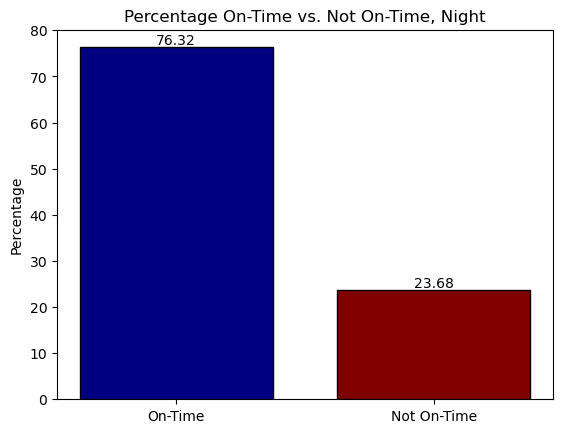

In [117]:
percent=[round(len(night.loc[night['ADJUSTED_ONTIME_COUNT']==1])/len(night['ADJUSTED_ONTIME_COUNT'])*100, 2), round(len(night.loc[night['ADJUSTED_ONTIME_COUNT']==0])/len(night['ADJUSTED_ONTIME_COUNT'])*100, 2)]
labels=['On-Time', 'Not On-Time']
fig, ax = plt.subplots()
bars = ax.bar(labels, percent, color=['navy', 'maroon'], edgecolor = 'black', width = .75)
ax.bar_label(bars)
plt.ylabel('Percentage')
plt.title('Percentage On-Time vs. Not On-Time, Night')
plt.savefig('night.png')
plt.show();

In [118]:
night['ADHERENCE'].describe()

count    62303.000000
mean        -3.292806
std          5.526848
min       -126.966666
25%         -4.666666
50%         -2.083333
75%         -0.433333
max         34.333333
Name: ADHERENCE, dtype: float64

In [119]:
night.groupby('hour')['ADHERENCE'].agg(['count', 'mean', 'std', 'median', 'min', 'max'])

,count,mean,std,median,min,max
hour,,,,,,
0,4020,-3.071600,6.408801,-1.500000,-58.400000,20.316666
1,111,-3.618168,6.557112,-1.650000,-30.483333,6.316666
19,13513,-4.068211,5.912977,-2.816666,-126.966666,33.750000
20,12317,-3.368831,4.736052,-2.450000,-58.116666,25.800000
21,11943,-2.846955,4.624154,-1.966666,-78.483333,34.333333
22,11246,-2.651855,5.035140,-1.666666,-76.250000,29.083333
23,9153,-3.508210,6.841246,-1.650000,-66.166666,15.433333


In [120]:
night_ontime=night.loc[night['ADJUSTED_ONTIME_COUNT']==1]
night_ontime['ADHERENCE'].describe()

count    49367.000000
mean        -1.597973
std          2.270503
min         -6.000000
25%         -3.150000
50%         -1.550000
75%         -0.283333
max         33.750000
Name: ADHERENCE, dtype: float64

In [121]:
night_ontime.groupby('hour')['ADHERENCE'].agg(['count', 'mean', 'std', 'median', 'min', 'max'])

,count,mean,std,median,min,max
hour,,,,,,
0,2871,-1.110316,2.447497,-1.083333,-5.983333,9.983333
1,57,-1.929824,1.978116,-1.600000,-5.900000,0.916666
19,10149,-1.906028,2.269090,-1.883333,-6.000000,33.750000
20,9742,-1.815857,2.241526,-1.816666,-6.000000,17.883333
21,9917,-1.620317,2.211173,-1.583333,-6.000000,11.050000
22,9492,-1.411257,2.221795,-1.366666,-6.000000,25.333333
23,7139,-1.273390,2.287514,-1.150000,-6.000000,11.566666


4. How much of a factor does the driver have on on-time performance? The driver is indicated by the OPERATOR variable.

In [123]:
len(wego['OPERATOR'].value_counts())

341

In [124]:
most_drivers=wego['OPERATOR'].value_counts().nlargest(10).reset_index()
most_list=most_drivers['OPERATOR'].values

In [125]:
most_all=wego.loc[wego['OPERATOR'].isin(most_list)]

In [126]:
round(len(most_all.loc[most_all['ADJUSTED_ONTIME_COUNT']==1])/len(most_all['ADJUSTED_ONTIME_COUNT'])*100, 2)

81.97

In [127]:
round(len(most_all.loc[most_all['ADJUSTED_ONTIME_COUNT']==0])/len(most_all['ADJUSTED_ONTIME_COUNT'])*100, 2)

18.03

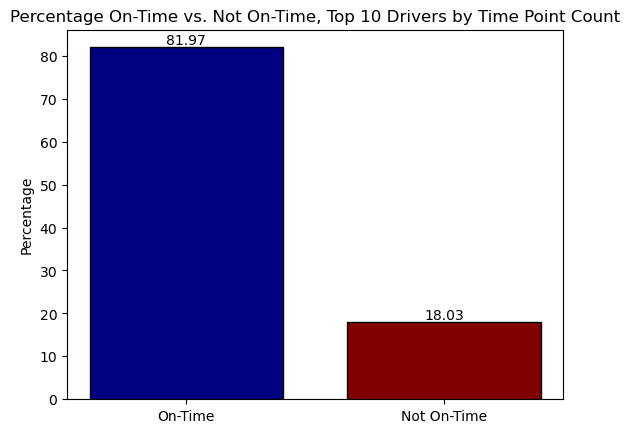

In [128]:
percent=[round(len(most_all.loc[most_all['ADJUSTED_ONTIME_COUNT']==1])/len(most_all['ADJUSTED_ONTIME_COUNT'])*100, 2), round(len(most_all.loc[most_all['ADJUSTED_ONTIME_COUNT']==0])/len(most_all['ADJUSTED_ONTIME_COUNT'])*100, 2)]
labels=['On-Time', 'Not On-Time']
fig, ax = plt.subplots()
bars = ax.bar(labels, percent, color=['navy', 'maroon'], edgecolor = 'black', width = .75)
ax.bar_label(bars)
plt.ylabel('Percentage')
plt.title('Percentage On-Time vs. Not On-Time, Top 10 Drivers by Time Point Count')
plt.savefig('topontime.png', bbox_inches='tight')
plt.show();

In [129]:
most_all['ADHERENCE'].describe()

count    25155.000000
mean        -2.588986
std          6.750882
min       -373.466666
25%         -3.550000
50%         -1.466666
75%         -0.150000
max         29.916666
Name: ADHERENCE, dtype: float64

In [130]:
most_all.groupby('OPERATOR')['ADHERENCE'].agg(['count', 'mean', 'std', 'median', 'min', 'max'])

,count,mean,std,median,min,max
OPERATOR,,,,,,
332,2392,-4.296523,10.959027,-2.441667,-373.466666,11.400000
1133,2625,-1.184013,2.500825,-0.683333,-14.366666,6.050000
1147,2686,-0.892399,2.919106,-0.750000,-23.816666,7.900000
1266,2865,-2.593304,4.769272,-2.316666,-92.283333,13.016666
1927,2413,-0.685405,2.403816,-0.583333,-14.833333,6.850000
2246,2382,-3.537167,5.128973,-2.416666,-93.750000,29.916666
2352,2605,-1.764005,8.911503,-0.816666,-366.933333,16.466666
2424,2517,-2.811707,4.385357,-2.100000,-40.400000,23.366666
2706,2310,-4.399192,10.517894,-1.966666,-92.983333,9.216666


In [131]:
most_all_ontime=most_all.loc[most_all['ADJUSTED_ONTIME_COUNT']==1]
most_all_ontime['ADHERENCE'].describe()

count    21411.000000
mean        -1.310608
std          2.168867
min         -6.000000
25%         -2.700000
50%         -1.200000
75%         -0.116666
max         18.583333
Name: ADHERENCE, dtype: float64

In [132]:
most_all_ontime.groupby('OPERATOR')['ADHERENCE'].agg(['count', 'mean', 'std', 'median', 'min', 'max'])

,count,mean,std,median,min,max
OPERATOR,,,,,,
332,1820,-1.867317,1.993438,-1.733333,-6.000000,6.250000
1133,2505,-0.903167,2.058425,-0.566666,-6.000000,6.050000
1147,2439,-0.743617,2.441971,-0.800000,-6.000000,7.900000
1266,2522,-1.990688,1.951231,-2.091667,-6.000000,5.483333
1927,2317,-0.537217,1.998678,-0.566666,-6.000000,6.850000
2246,1895,-1.905268,2.149429,-1.716666,-6.000000,18.583333
2352,2148,-0.783783,2.259994,-0.800000,-6.000000,8.233333
2424,2146,-1.733170,2.198721,-1.816666,-6.000000,7.366666
2706,1784,-1.621179,2.059757,-1.533333,-6.000000,7.050000


In [133]:
least_drivers=wego['OPERATOR'].value_counts().nsmallest(10).reset_index()
least_list=least_drivers['OPERATOR'].values

In [134]:
least_all=wego.loc[wego['OPERATOR'].isin(least_list)]

In [135]:
round(len(least_all.loc[least_all['ADJUSTED_ONTIME_COUNT']==1])/len(least_all['ADJUSTED_ONTIME_COUNT'])*100, 2)

72.86

In [136]:
round(len(least_all.loc[least_all['ADJUSTED_ONTIME_COUNT']==0])/len(least_all['ADJUSTED_ONTIME_COUNT'])*100, 2)

27.14

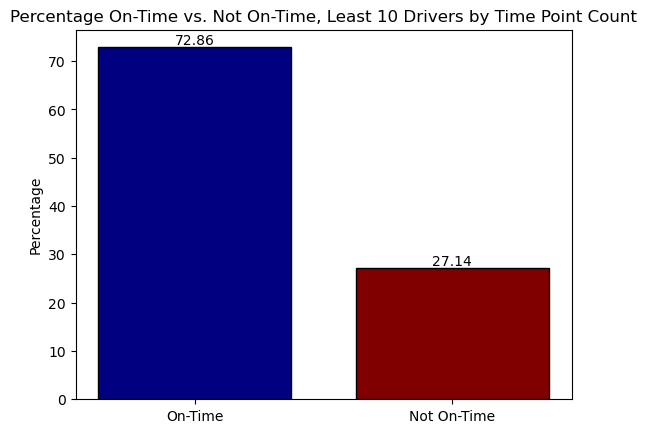

In [137]:
percent=[round(len(least_all.loc[least_all['ADJUSTED_ONTIME_COUNT']==1])/len(least_all['ADJUSTED_ONTIME_COUNT'])*100, 2), round(len(least_all.loc[least_all['ADJUSTED_ONTIME_COUNT']==0])/len(least_all['ADJUSTED_ONTIME_COUNT'])*100, 2)]
labels=['On-Time', 'Not On-Time']
fig, ax = plt.subplots()
bars = ax.bar(labels, percent, color=['navy', 'maroon'], edgecolor = 'black', width = .75)
ax.bar_label(bars)
plt.ylabel('Percentage')
plt.title('Percentage On-Time vs. Not On-Time, Least 10 Drivers by Time Point Count')
plt.savefig('leastontime.png', bbox_inches='tight')
plt.show();

In [138]:
least_all['ADHERENCE'].describe()

count    68.000000
mean     -3.660784
std       4.176369
min     -22.066666
25%      -5.537500
50%      -3.608333
75%      -1.566666
max       8.916666
Name: ADHERENCE, dtype: float64

In [139]:
least_all.groupby('OPERATOR')['ADHERENCE'].agg(['count', 'mean', 'std', 'median', 'min', 'max'])

,count,mean,std,median,min,max
OPERATOR,,,,,,
0,1,8.916666,NaN,8.916666,8.916666,8.916666
56,3,-1.138889,1.570592,-0.633333,-2.900000,0.116666
235,12,-3.947222,5.236424,-5.016666,-10.216666,6.550000
375,12,-2.765277,2.358259,-2.533333,-7.266666,0.150000
473,1,-22.066666,NaN,-22.066666,-22.066666,-22.066666
656,1,-7.600000,NaN,-7.600000,-7.600000,-7.600000
2256,6,-0.441667,1.912931,-0.383333,-3.433333,2.216666
2313,10,-3.775000,1.595291,-3.700000,-6.866666,-1.883333
2377,10,-3.555000,2.753259,-3.250000,-10.533333,-0.700000


In [140]:
least_all['OPERATOR'].value_counts()

OPERATOR
375     13
235     12
3077    12
2313    10
2377    10
2256     6
56       3
473      2
656      1
0        1
Name: count, dtype: int64

In [141]:
least_late=least_all.loc[least_all['ADJUSTED_ONTIME_COUNT']==1]

In [142]:
least_late['OPERATOR'].value_counts()

OPERATOR
375     11
2313     9
2377     9
3077     7
235      6
2256     5
56       3
0        1
Name: count, dtype: int64

In [143]:
least_all_ontime=least_all.loc[least_all['ADJUSTED_ONTIME_COUNT']==1]
least_all_ontime['ADHERENCE'].describe()

count    51.000000
mean     -2.386601
std       2.776058
min      -5.950000
25%      -4.183333
50%      -2.900000
75%      -1.083333
max       8.916666
Name: ADHERENCE, dtype: float64

In [144]:
least_all_ontime.groupby('OPERATOR')['ADHERENCE'].agg(['count', 'mean', 'std', 'median', 'min', 'max'])

,count,mean,std,median,min,max
OPERATOR,,,,,,
0,1,8.916666,NaN,8.916666,8.916666,8.916666
56,3,-1.138889,1.570592,-0.633333,-2.900000,0.116666
235,6,-1.458333,4.505117,-3.066667,-5.850000,6.550000
375,11,-2.356060,1.976631,-1.816666,-5.366666,0.150000
2256,5,-0.973333,1.566560,-0.916666,-3.433333,0.583333
2313,9,-3.431481,1.239160,-3.566666,-5.233333,-1.883333
2377,9,-2.779629,1.328344,-3.200000,-4.383333,-0.700000
3077,7,-4.540476,1.433652,-5.100000,-5.950000,-1.700000


In [145]:
wego.loc[wego['OPERATOR']==473]

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,hour,time_of_day
279759,120230918,1,100063961,2023-09-18,22,8405,473,353981,0,TO DOWNTOWN,CRES,11.0,1,36.194535,-86.837139,2023-09-18 15:15:00,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0.0,0,NaN,NaN,15,Mid-day
279760,120230918,1,100063962,2023-09-18,22,8405,473,353981,0,TO DOWNTOWN,MCC5_2,3.0,2,36.167091,-86.781923,2023-09-18 15:40:00,2023-09-18 16:02:04,2023-09-18 16:02:04,-22.066666,NaN,NaN,NaN,0,1,0,0,NaN,0,0.0,NaN,15,Mid-day


In [146]:
wego.groupby('OPERATOR')['ADHERENCE'].mean().nlargest(10)

OPERATOR
0       8.916666
2646    2.395238
1761    1.297954
1762    1.168067
1606    1.124510
465     1.119445
1170    0.533208
2639    0.462882
1730    0.389813
2103    0.267931
Name: ADHERENCE, dtype: float64

In [147]:
high_ad=wego.groupby('OPERATOR')['ADHERENCE'].mean().nlargest(10).reset_index()
high_ad_list=high_ad['OPERATOR'].values

In [148]:
high_ad_all=wego.loc[wego['OPERATOR'].isin(high_ad_list)]

In [149]:
round(len(high_ad_all.loc[high_ad_all['ADJUSTED_ONTIME_COUNT']==1])/len(high_ad_all['ADJUSTED_ONTIME_COUNT'])*100, 2)

88.9

In [150]:
round(len(high_ad_all.loc[high_ad_all['ADJUSTED_ONTIME_COUNT']==0])/len(high_ad_all['ADJUSTED_ONTIME_COUNT'])*100, 2)

11.1

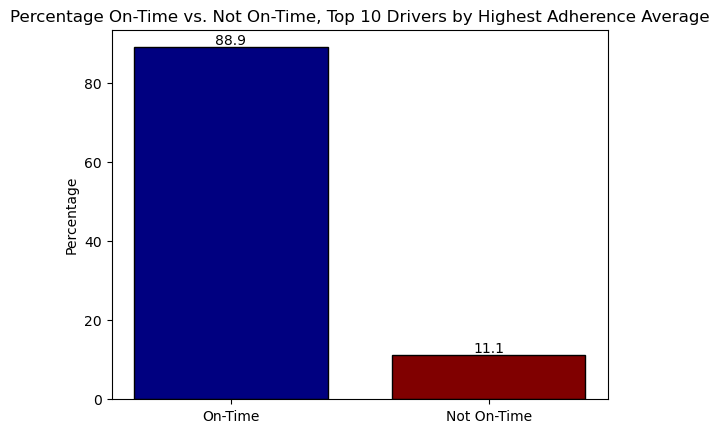

In [151]:
percent=[round(len(high_ad_all.loc[high_ad_all['ADJUSTED_ONTIME_COUNT']==1])/len(high_ad_all['ADJUSTED_ONTIME_COUNT'])*100, 2), round(len(high_ad_all.loc[high_ad_all['ADJUSTED_ONTIME_COUNT']==0])/len(high_ad_all['ADJUSTED_ONTIME_COUNT'])*100, 2)]
labels=['On-Time', 'Not On-Time']
fig, ax = plt.subplots()
bars = ax.bar(labels, percent, color=['navy', 'maroon'], edgecolor = 'black', width = .75)
ax.bar_label(bars)
plt.ylabel('Percentage')
plt.title('Percentage On-Time vs. Not On-Time, Top 10 Drivers by Highest Adherence Average')
plt.savefig('highadontime.png', bbox_inches='tight')
plt.show();

In [152]:
high_ad_all['ADHERENCE'].describe()

count    8101.000000
mean        0.895871
std         3.845560
min      -118.100000
25%        -0.550000
50%         0.466666
75%         2.450000
max        24.233333
Name: ADHERENCE, dtype: float64

In [153]:
high_ad_all.groupby('OPERATOR')['ADHERENCE'].agg(['count', 'mean', 'std', 'median', 'min', 'max'])

,count,mean,std,median,min,max
OPERATOR,,,,,,
0,1,8.916666,NaN,8.916666,8.916666,8.916666
465,18,1.119445,3.031486,0.066667,-2.766666,7.533333
1170,2123,0.533208,2.919996,0.166666,-10.233333,8.000000
1606,17,1.124510,2.772409,0.850000,-2.650000,8.033333
1730,661,0.389813,3.382121,0.866666,-26.150000,10.366666
1761,2126,1.297954,3.140948,0.741667,-12.883333,10.950000
1762,2333,1.168067,4.740741,0.550000,-118.100000,15.966666
2103,580,0.267931,4.947701,0.116666,-52.900000,8.116666
2639,207,0.462882,3.910522,-0.433333,-19.150000,12.200000


In [154]:
high_ad_all_ontime=high_ad_all.loc[high_ad_all['ADJUSTED_ONTIME_COUNT']==1]
high_ad_all_ontime['ADHERENCE'].describe()

count    7381.000000
mean        1.006770
std         2.867130
min        -5.916666
25%        -0.633333
50%         0.350000
75%         2.800000
max        12.200000
Name: ADHERENCE, dtype: float64

In [155]:
high_ad_all_ontime.groupby('OPERATOR')['ADHERENCE'].agg(['count', 'mean', 'std', 'median', 'min', 'max'])

,count,mean,std,median,min,max
OPERATOR,,,,,,
0,1,8.916666,NaN,8.916666,8.916666,8.916666
465,12,-0.575000,1.479429,-0.508333,-2.766666,2.183333
1170,1923,0.462324,2.942082,0.000000,-5.916666,8.000000
1606,13,0.980769,3.183543,0.200000,-2.650000,8.033333
1730,460,0.501377,2.516123,0.241667,-5.750000,10.366666
1761,1917,1.391019,3.015343,0.633333,-5.900000,10.950000
1762,2294,1.392618,2.569372,0.566666,-5.616666,10.166666
2103,529,0.611878,2.716008,0.033333,-5.533333,8.116666
2639,202,0.580363,3.673873,-0.441667,-5.733333,12.200000


In [156]:
wego.groupby('OPERATOR')['ADHERENCE'].mean().nsmallest(10)

OPERATOR
473    -22.066666
2530   -16.606617
2982   -14.233333
3101   -11.131714
1016   -10.519806
1880    -9.765789
2137    -9.382539
2400    -9.353590
3098    -9.131473
3096    -9.082834
Name: ADHERENCE, dtype: float64

In [157]:
low_ad=wego.groupby('OPERATOR')['ADHERENCE'].mean().nsmallest(10).reset_index()
low_ad_list=low_ad['OPERATOR'].values

In [158]:
low_ad_all=wego.loc[wego['OPERATOR'].isin(low_ad_list)]

In [159]:
round(len(low_ad_all.loc[low_ad_all['ADJUSTED_ONTIME_COUNT']==1])/len(low_ad_all['ADJUSTED_ONTIME_COUNT'])*100, 2)

38.49

In [160]:
round(len(low_ad_all.loc[low_ad_all['ADJUSTED_ONTIME_COUNT']==0])/len(low_ad_all['ADJUSTED_ONTIME_COUNT'])*100, 2)

61.51

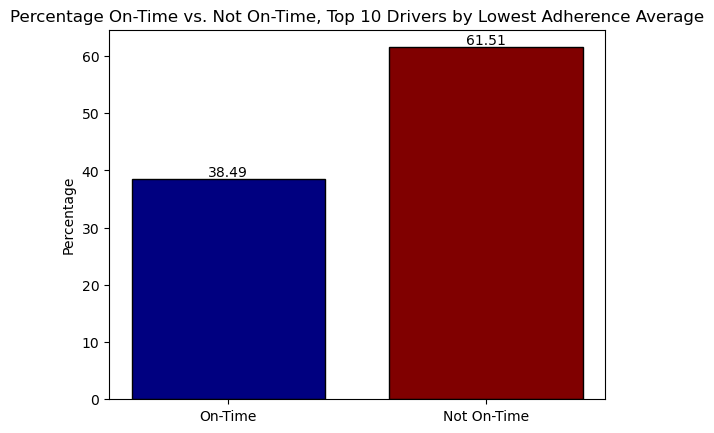

In [161]:
percent=[round(len(low_ad_all.loc[low_ad_all['ADJUSTED_ONTIME_COUNT']==1])/len(low_ad_all['ADJUSTED_ONTIME_COUNT'])*100, 2), round(len(low_ad_all.loc[low_ad_all['ADJUSTED_ONTIME_COUNT']==0])/len(low_ad_all['ADJUSTED_ONTIME_COUNT'])*100, 2)]
labels=['On-Time', 'Not On-Time']
fig, ax = plt.subplots()
bars = ax.bar(labels, percent, color=['navy', 'maroon'], edgecolor = 'black', width = .75)
ax.bar_label(bars)
plt.ylabel('Percentage')
plt.title('Percentage On-Time vs. Not On-Time, Top 10 Drivers by Lowest Adherence Average')
plt.savefig('lowadontime.png', bbox_inches='tight')
plt.show();

In [162]:
low_ad_all['ADHERENCE'].describe()

count    3218.000000
mean      -10.214015
std        14.761357
min      -489.316666
25%       -14.320833
50%        -6.708333
75%        -2.550000
max        30.200000
Name: ADHERENCE, dtype: float64

In [163]:
low_ad_all.groupby('OPERATOR')['ADHERENCE'].agg(['count', 'mean', 'std', 'median', 'min', 'max'])

,count,mean,std,median,min,max
OPERATOR,,,,,,
473,1,-22.066666,NaN,-22.066666,-22.066666,-22.066666
1016,138,-10.519806,9.196002,-9.183333,-36.866666,4.883333
1880,76,-9.765789,28.165911,-1.316666,-166.566666,18.000000
2137,21,-9.382539,8.426663,-10.400000,-25.033333,0.183333
2400,130,-9.353590,9.752896,-7.641666,-32.516666,9.483333
2530,68,-16.606617,61.058562,-2.666666,-489.316666,9.950000
2982,28,-14.233333,6.991460,-12.058333,-26.816666,-0.300000
3096,1002,-9.082834,9.227263,-6.566666,-67.266666,7.483333
3098,457,-9.131473,11.587634,-6.533333,-79.566666,7.450000


In [164]:
low_ad_all_ontime=low_ad_all.loc[low_ad_all['ADJUSTED_ONTIME_COUNT']==1]
low_ad_all_ontime['ADHERENCE'].describe()

count    1408.000000
mean       -2.344957
std         2.350827
min        -6.000000
25%        -3.966666
50%        -2.475000
75%        -0.883333
max        30.200000
Name: ADHERENCE, dtype: float64

In [165]:
low_ad_all_ontime.groupby('OPERATOR')['ADHERENCE'].agg(['count', 'mean', 'std', 'median', 'min', 'max'])

,count,mean,std,median,min,max
OPERATOR,,,,,,
1016,51,-1.692157,2.333698,-1.900000,-5.533333,4.883333
1880,51,-0.418954,2.610840,-0.266666,-5.816666,8.066666
2137,10,-2.078333,1.767122,-1.874999,-4.883333,0.183333
2400,45,-2.252963,2.168488,-2.166666,-5.966666,5.116666
2530,44,-1.110606,2.768548,-1.075000,-5.666666,9.950000
2982,2,-2.616667,3.276261,-2.616667,-4.933333,-0.300000
3096,427,-2.758040,2.101041,-2.950000,-6.000000,7.483333
3098,199,-2.695728,2.351485,-3.066666,-5.983333,7.450000
3101,579,-2.251525,2.364019,-2.166666,-5.983333,30.200000


In [166]:
low_ad_all['OPERATOR'].value_counts()

OPERATOR
3101    1374
3096    1044
3098     479
1016     297
2400     189
2530     101
1880      95
2137      44
2982      33
473        2
Name: count, dtype: int64

In [167]:
low_late=low_ad_all.loc[low_ad_all['ADJUSTED_ONTIME_COUNT']==1]
low_late['OPERATOR'].value_counts()

OPERATOR
3101    579
3096    427
3098    199
1016     51
1880     51
2400     45
2530     44
2137     10
2982      2
Name: count, dtype: int64

In [168]:
wego.loc[wego['ADHERENCE']==-948.533333]

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,hour,time_of_day
103162,120230818,1,99963004,2023-08-18,52,5202,1052,352052,0,FROM DOWNTOWN,MCC4_19,2.0,1,36.167091,-86.781923,2023-08-18 06:15:00,2023-08-18 06:07:02,2023-08-18 22:03:32,-948.533333,15.0,30.583333,15.583333,0,1,0,0,0.0,0,956.5,8.0,6,Early Morning


5. Is there any relationship between lateness (ADHERENCE) and headway deviation?

In [170]:
wego['HDWAY_DEV_PERC']=round(wego['HDWY_DEV']/wego['SCHEDULED_HDWY']*100, 3)

In [171]:
low_hdway=wego.loc[wego['HDWAY_DEV_PERC'] < 50]

In [172]:
round(len(low_hdway.loc[low_hdway['ADJUSTED_ONTIME_COUNT']==1])/len(low_hdway['ADJUSTED_ONTIME_COUNT'])*100, 2)

83.46

In [173]:
round(len(low_hdway.loc[low_hdway['ADJUSTED_ONTIME_COUNT']==0])/len(low_hdway['ADJUSTED_ONTIME_COUNT'])*100, 2)

16.54

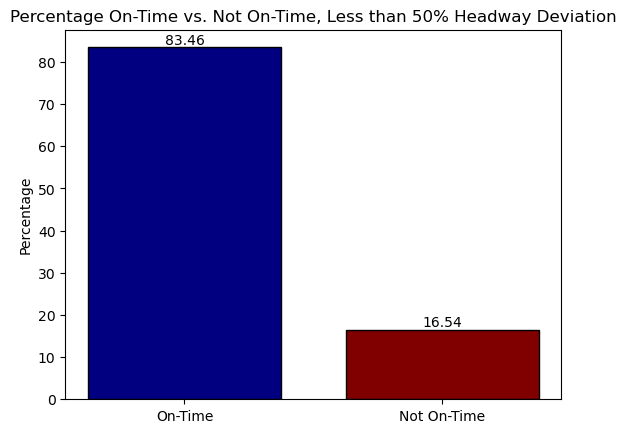

In [174]:
percent=[round(len(low_hdway.loc[low_hdway['ADJUSTED_ONTIME_COUNT']==1])/len(low_hdway['ADJUSTED_ONTIME_COUNT'])*100, 2), round(len(low_hdway.loc[low_hdway['ADJUSTED_ONTIME_COUNT']==0])/len(low_hdway['ADJUSTED_ONTIME_COUNT'])*100, 2)]
labels=['On-Time', 'Not On-Time']
fig, ax = plt.subplots()
bars = ax.bar(labels, percent, color=['navy', 'maroon'], edgecolor = 'black', width = .75)
ax.bar_label(bars)
plt.ylabel('Percentage')
plt.title('Percentage On-Time vs. Not On-Time, Less than 50% Headway Deviation')
plt.savefig('less50.png', bbox_inches='tight')
plt.show();

In [175]:
late_low=low_hdway.loc[low_hdway['ADJUSTED_LATE_COUNT']==1]

In [176]:
late_low['ADHERENCE'].corr(late_low['HDWY_DEV'])

0.22798171226553646

In [177]:
high_hdway=wego.loc[wego['HDWAY_DEV_PERC'] >150]

In [178]:
round(len(high_hdway.loc[high_hdway['ADJUSTED_ONTIME_COUNT']==1])/len(high_hdway['ADJUSTED_ONTIME_COUNT'])*100, 2)

30.96

In [179]:
round(len(high_hdway.loc[high_hdway['ADJUSTED_ONTIME_COUNT']==0])/len(high_hdway['ADJUSTED_ONTIME_COUNT'])*100, 2)

69.04

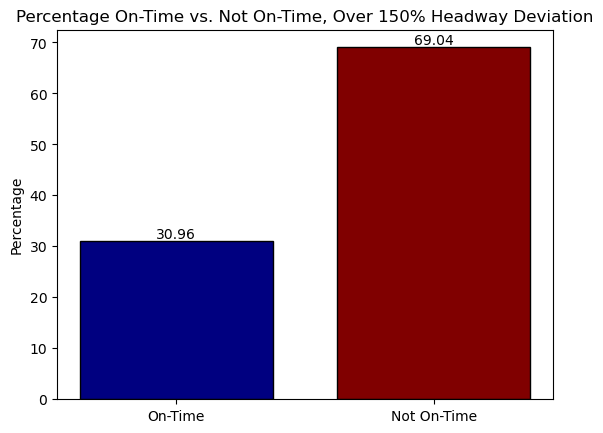

In [180]:
percent=[round(len(high_hdway.loc[high_hdway['ADJUSTED_ONTIME_COUNT']==1])/len(high_hdway['ADJUSTED_ONTIME_COUNT'])*100, 2), round(len(high_hdway.loc[high_hdway['ADJUSTED_ONTIME_COUNT']==0])/len(high_hdway['ADJUSTED_ONTIME_COUNT'])*100, 2)]
labels=['On-Time', 'Not On-Time']
fig, ax = plt.subplots()
bars = ax.bar(labels, percent, color=['navy', 'maroon'], edgecolor = 'black', width = .75)
ax.bar_label(bars)
plt.ylabel('Percentage')
plt.title('Percentage On-Time vs. Not On-Time, Over 150% Headway Deviation')
plt.savefig('over150.png', bbox_inches='tight')
plt.show();

In [181]:
late_high=high_hdway.loc[high_hdway['ADJUSTED_LATE_COUNT']==1]

In [182]:
late_high['ADHERENCE'].corr(late_high['HDWY_DEV'])

-0.15243239095390518